In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Le test réel**



*   Le code commence par charger les bibliothèques et le modèle pré-entraîné Faster R-CNN.

*   Il définit des fonctions pour charger et prétraiter les images, et pour afficher les images avec les détections.



*  Une image est uploadée via l'interface graphique de Colab.

*   L'image est chargée, prétraitée et passée au modèle pour obtenir les prédictions.

*   Les prédictions sont affichées sur l'image et le nombre de cellules fragmentées et non fragmentées est compté et imprimé.









Saving L6_5_4.jpg to L6_5_4.jpg


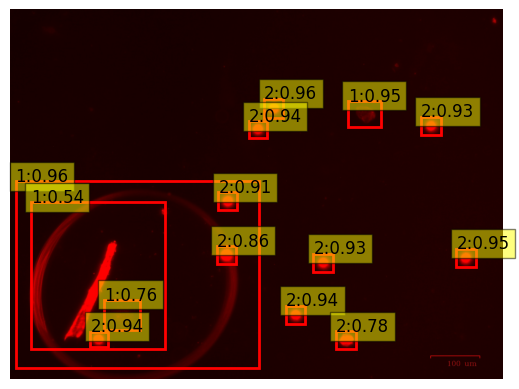

Nombre de cellules fragmentées : 4
Nombre de cellules non fragmentées : 10


In [7]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Charger le modèle et ses poids
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
model.load_state_dict(torch.load('/content/drive/My Drive/projet_datamining/fasterrcnn_model.pth', map_location=torch.device('cpu')))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fonction pour charger et prétraiter une image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([
        T.ToTensor()
    ])
    return transform(image).unsqueeze(0).to(device)

# Fonction pour afficher l'image avec les prédictions
def plot_detections(image_path, outputs):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)

    ax = plt.gca()
    fragmented_count = 0
    non_fragmented_count = 0

    for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
        if score > 0.5:  # Seulement les prédictions avec un score > 0.5
            box = box.cpu().numpy()
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color='red', linewidth=2))
            ax.text(box[0], box[1], f"{label.item()}:{score:.2f}",
                    bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

            # Compter les cellules fragmentées et non fragmentées
            if label.item() == 1:
                fragmented_count += 1
            elif label.item() == 2:
                non_fragmented_count += 1

    plt.axis('off')
    plt.show()

    return fragmented_count, non_fragmented_count

# Uploader une image via l'interface graphique
uploaded = files.upload()

# Utiliser le fichier uploadé (assume le premier fichier)
for filename in uploaded.keys():
    image_path = '/content/' + filename
    image = load_image(image_path)

    with torch.no_grad():
        outputs = model(image)[0]
        fragmented_count, non_fragmented_count = plot_detections(image_path, outputs)

    print(f"Nombre de cellules fragmentées : {fragmented_count}")
    print(f"Nombre de cellules non fragmentées : {non_fragmented_count}")
    break  # Utiliser uniquement le premier fichier uploadé
